# Lending Club Case Study Using EDA Approach

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Importing dataset
loan_dataset = pd.read_csv("E:\\UpGrad\\Loan_Case_Study\\loan.csv")

In [3]:
##### Checking the shape of the dataset (number of rows, number of columns)
loan_dataset.shape

(39717, 111)

In [4]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
##### to display all the required columns, rows in the dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
##### checking the first 5 rows in the dataset

loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Check the NA values for data cleaning and remove the 100% NA attributes from data set
100*(loan_dataset.isna().sum()/loan_dataset.shape[0])

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [8]:
#### Removing the columns which have all the rows as NA

loan_dataset = loan_dataset.dropna(axis=1, how='all')

In [9]:
loan_dataset.shape

(39717, 57)

#### Remove the other columns which does not impact the  analysis 
                                                                                                                               list of columns are below :
                                                                                                                       emp_title,url,desc,title,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,      delinq_amnt,tax_liens,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,policy_code

In [10]:
##### dropping the above mentioned columns

loan_dataset = loan_dataset.drop(['emp_title','url','desc','title','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths',
                                 'delinq_amnt','tax_liens',
                                 'delinq_2yrs','earliest_cr_line','inq_last_6mths','pub_rec','revol_bal'
                                  ,'out_prncp','out_prncp_inv','total_pymnt',
                                  'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                                  'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                                  'last_credit_pull_d','application_type','mths_since_last_delinq','mths_since_last_record',
                                 'initial_list_status','next_pymnt_d','policy_code'], axis = 1)

In [11]:
loan_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

In [12]:
# Identifiying the number of unique values for the columns
for i in loan_dataset.columns:
    print(i, loan_dataset[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
purpose 14
zip_code 823
addr_state 50
dti 2868
open_acc 40
revol_util 1089
total_acc 82
pub_rec_bankruptcies 3


In [13]:
### Checking for missing values
loan_dataset.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
open_acc                   0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [14]:
#### Find the mode for emp_length column to replace the missing values
loan_dataset.emp_length.mode()[0]

'10+ years'

In [15]:
# Repacling missing values with '10+ years'
loan_dataset['emp_length'] = loan_dataset['emp_length'].fillna(loan_dataset.emp_length.mode()[0])
loan_dataset.emp_length.isnull().sum()

0

In [16]:
#### Find the mode for pub_rec_bankruptcies column to replace the missing values
loan_dataset.pub_rec_bankruptcies.mode()[0] 

0.0

In [17]:
#### Replacing NA values in pub_rec_bankruptcies with mode
loan_dataset['pub_rec_bankruptcies'] = loan_dataset['pub_rec_bankruptcies'].fillna(loan_dataset.pub_rec_bankruptcies.mode()[0])

#verifying pub_rec_bankruptcies column
loan_dataset.pub_rec_bankruptcies.isnull().sum()

0

In [18]:
# checking loan dataset for nulls again
loan_dataset.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
pymnt_plan               0
purpose                  0
zip_code                 0
addr_state               0
dti                      0
open_acc                 0
revol_util              50
total_acc                0
pub_rec_bankruptcies     0
dtype: int64

In [19]:
# # Converting the emp_length values into numerical value to show on graph as continuous categorical
loan_dataset.emp_length.value_counts()


10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [20]:
# replace_emplength function will replace the string values years,year,+,< 1 
def replace_emplength(val):
    return str(val.replace("years", "").replace("year","").replace("+", "").replace("< 1", "0"))

loan_dataset.emp_length = loan_dataset.emp_length.apply(replace_emplength)
loan_dataset.emp_length=loan_dataset.emp_length.astype(int)

loan_dataset.emp_length.value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [21]:
# repalce % with '' for int_rate to grouping the values 
def clean_interest_rates(val):
    return float(val.replace("%", ""))
loan_dataset.int_rate = loan_dataset.int_rate.apply(clean_interest_rates)
loan_dataset.int_rate = loan_dataset.int_rate.replace("%","")

loan_dataset.revol_util = loan_dataset.revol_util.replace("%","")


#### Removing rows where loan_status is "Current"  because this data is not related to drive the defalters

In [22]:
loan_dataset.shape

(39717, 25)

In [23]:
loan_dataset[loan_dataset['loan_status'] == 'Current'].shape

(1140, 25)

In [24]:
loan_dataset = loan_dataset[~(loan_dataset.loan_status == "Current")]

In [25]:
loan_dataset.shape

(38577, 25)

In [26]:
loan_dataset.describe().apply(lambda s: s.apply('{0:.5f}'.format))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loan_dataset['annual_inc'].describe()


count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
max     6000000.000
Name: annual_inc, dtype: float64

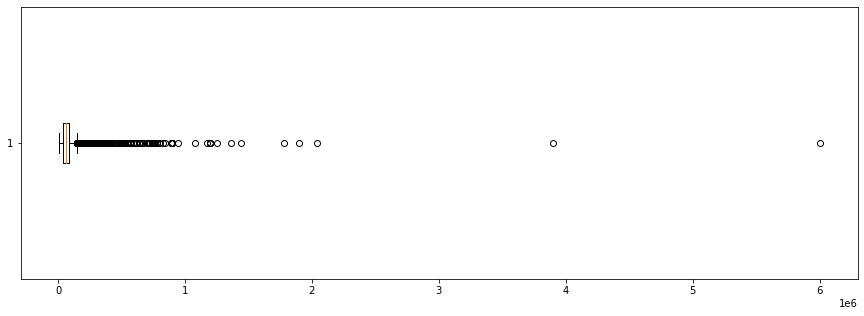

In [27]:
# Box plot for Annual income to find if there are any outliers
f, ax = plt.subplots(figsize=(15, 5))
plt.boxplot(loan_dataset.annual_inc,vert=False)


plt.show()

We observed that Annual income has outliers, need to remove the outliers from data set.
Outliers are removed using IQR method

In [28]:
Q1 = loan_dataset.annual_inc.quantile(0.25)
Q3 = loan_dataset.annual_inc.quantile(0.75)
IQR = Q3-Q1


loan_dataset_cleared_iqr = loan_dataset[~((loan_dataset.annual_inc < (Q1 - 1.5 * IQR)) |(loan_dataset.annual_inc > (Q3 + 1.5 * IQR)))]
loan_dataset_cleared_iqr
loan_dataset_cleared_iqr.shape
print(loan_dataset_cleared_iqr.shape)
print(loan_dataset.shape)

(36815, 25)
(38577, 25)


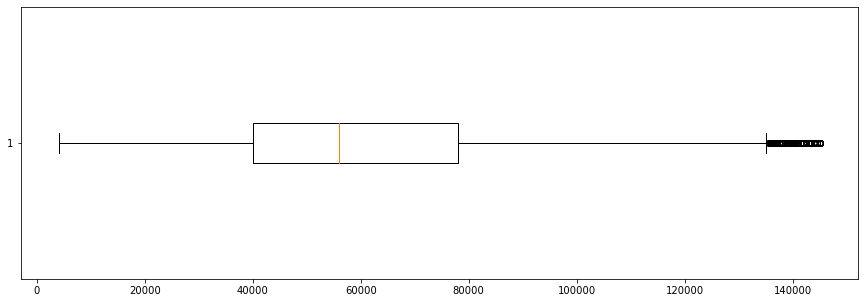

count    36815.000
mean     61218.193
std      28224.584
min       4000.000
25%      40000.000
50%      56000.000
75%      78000.000
max     145000.000
Name: annual_inc, dtype: float64

In [29]:
# plotting boxplot after removing outliers in the Annual income
f, ax = plt.subplots(figsize=(15, 5))
plt.boxplot(loan_dataset_cleared_iqr.annual_inc,vert=False)

plt.show()
loan_dataset_cleared_iqr['annual_inc'].describe()

#### Sanity checks

In [30]:
### just to check that the funded amount is less or equal to that of loan amount

loan_dataset_cleared_iqr[(loan_dataset_cleared_iqr.funded_amnt > loan_dataset_cleared_iqr.loan_amnt)].shape


(0, 25)

In [31]:
#checking unique values for home_ownership 
loan_dataset_cleared_iqr['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [32]:
#replacing 'NONE' with 'OTHERS'
loan_dataset_cleared_iqr['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

##  UNIVARIATE ANALYSIS

In [33]:
# Taking charged off rows to a seperate dataset

charged_off_dataset = loan_dataset_cleared_iqr[loan_dataset_cleared_iqr['loan_status'] == 'Charged Off']

In [34]:
charged_off_dataset.shape

(5431, 25)

In [35]:
charged_off_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,open_acc,revol_util,total_acc,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.000,3,9.40%,4,0.000
8,1071795,1306957,5600,5600,5600.000,60 months,21.280,152.390,F,F2,4,OWN,40000.000,Source Verified,Dec-11,Charged Off,n,small_business,958xx,CA,5.550,11,32.60%,13,0.000
9,1071570,1306721,5375,5375,5350.000,60 months,12.690,121.450,B,B5,0,RENT,15000.000,Verified,Dec-11,Charged Off,n,other,774xx,TX,18.080,2,36.50%,3,0.000
12,1064687,1298717,9000,9000,9000.000,36 months,13.490,305.380,C,C1,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,debt_consolidation,245xx,VA,10.080,4,91.70%,9,0.000
14,1069057,1303503,10000,10000,10000.000,36 months,10.650,325.740,B,B2,3,RENT,100000.000,Source Verified,Dec-11,Charged Off,n,other,951xx,CA,7.060,14,55.50%,29,0.000


#### Visualizations

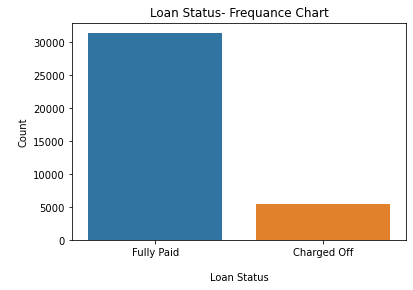

In [36]:
#The below graph is to find over all charged off count againt Fully paid sutomers. Hence here we considered loan_dataset_cleared_iqr datset

sns.countplot(x = 'loan_status', data = loan_dataset_cleared_iqr)
plt.xlabel("\nLoan Status")
plt.ylabel("\nCount")
plt.title("Loan Status- Frequance Chart")
plt.show()

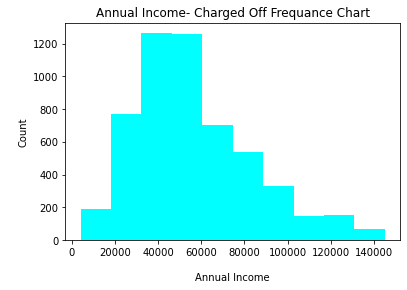

In [37]:
# plotting the histogram for 'Chargedof' dataset to find the annual income for the defaulters 

plt.hist(charged_off_dataset.annual_inc, color = 'cyan')
plt.xlabel("\nAnnual Income")
plt.ylabel("\nCount")
plt.title("Annual Income- Charged Off Frequance Chart")
plt.show()

#### Observation 1 : Individuals who are having annual income has 40000 or 60000 having default chance

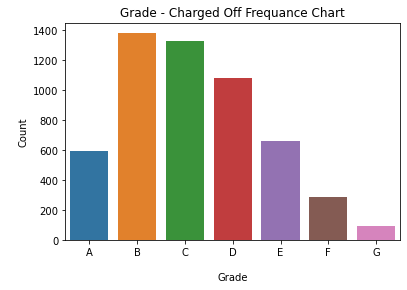

In [38]:
# plotting the countplot for 'Chargedof' dataset to find the grade which have maximum defaulters count 

cd=charged_off_dataset.grade.sort_values(ascending=True);
sns.countplot(cd)
plt.xlabel("\nGrade")
plt.ylabel("\nCount")
plt.title("Grade - Charged Off Frequance Chart")
plt.show()

#### Observation 2 : Most of the Charged-Off Grade are B,C, D

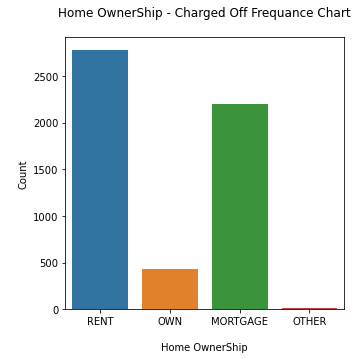

In [39]:
##Analyzing home_ownership

fig, ax = plt.subplots(figsize = (5,5))

sns.countplot(x='home_ownership', data=charged_off_dataset)
plt.xlabel("\nHome OwnerShip")
plt.ylabel("\nCount")
plt.title("Home OwnerShip - Charged Off Frequance Chart\n")
plt.show()

#### Onservation 3 :  If the home_ownership is RENT or MORTGAGE then scope of falling into charged off is more

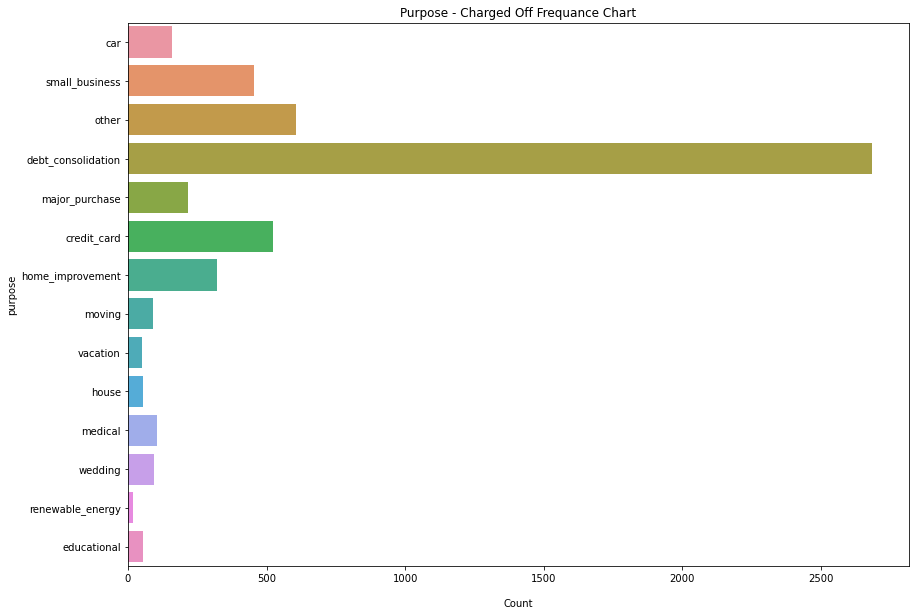

In [40]:
# plotting the countplot for 'Chargedof' dataset to find the purpose which have maximum defaulters count .

fig, ax = plt.subplots(figsize = (14,10))

sns.countplot(y ='purpose', data=charged_off_dataset)
plt.xlabel("\nCount")

plt.title("Purpose - Charged Off Frequance Chart")
plt.show()

#### Observation 4 : From the purpose histogram it is clearly seen that debt_consolidation has more in number for falling into charged off

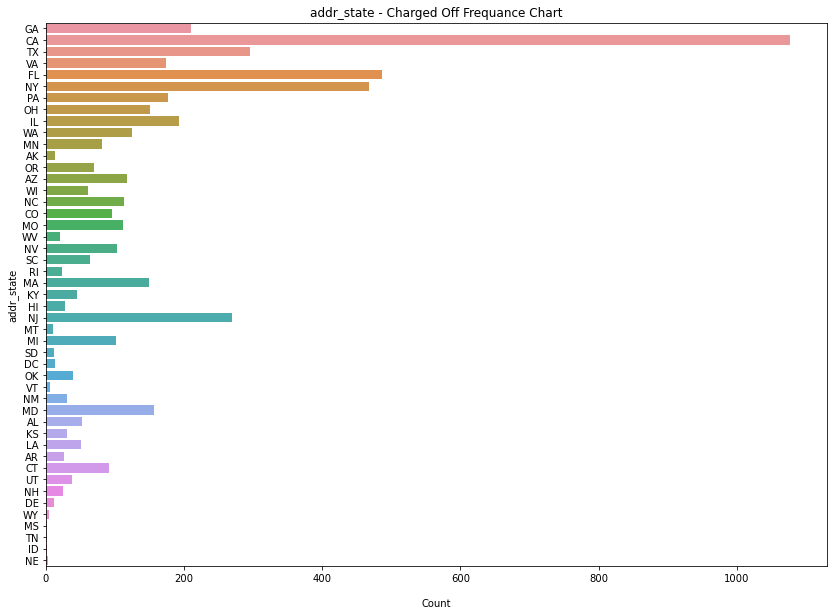

In [41]:
# plotting the countplot for 'Chargedof' dataset to find the state which have maximum defaulters count .
fig, ax = plt.subplots(figsize = (14,10))

sns.countplot(y ='addr_state', data=charged_off_dataset)
plt.xlabel("\nCount")

plt.title("addr_state - Charged Off Frequance Chart")
plt.show()

#### Observation 5 : From the address state CA tend to have more defaulters.

# BIVARIATE ANALYSIS

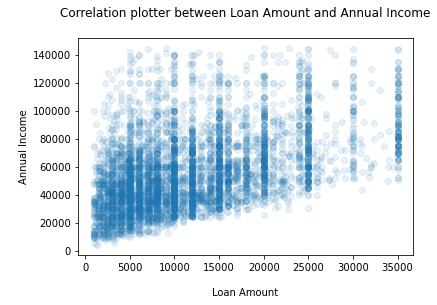

In [42]:
### Plotting a scatter plot to just find out if there is any correlation between loan_amount and annual_inc

plt.scatter(x = charged_off_dataset.loan_amnt, y =charged_off_dataset.annual_inc, alpha = 0.1)

plt.xlabel("\nLoan Amount")
plt.ylabel("\nAnnual Income")
plt.title("Correlation plotter between Loan Amount and Annual Income\n")
plt.show()

#### Observation  6 : From the above scatter plot we observe that density of the loan takers are in the range of 500-20000

In [43]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['grade'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")

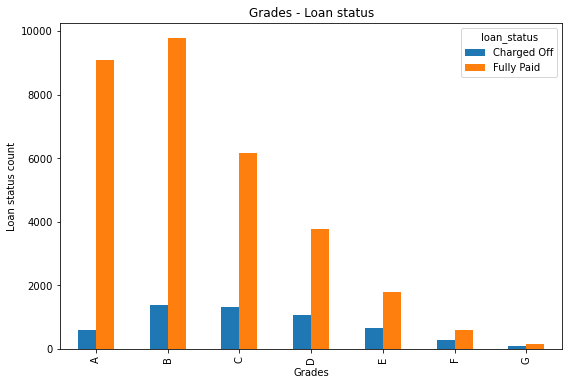

In [44]:
ax = df_pivot['id'].plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(9, 6)
plt.title("Grades - Loan status")
ax.set_xlabel("Grades")
ax.set_ylabel("Loan status count")
plt.show()


#### Obsesrvation 7 : Even from the bivariate analysis Most of the Charged-Off Grade are B,C, D. And we also observe that E, F, G have almost half of the defaulters when compared with Fully paid

In [45]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['sub_grade'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")


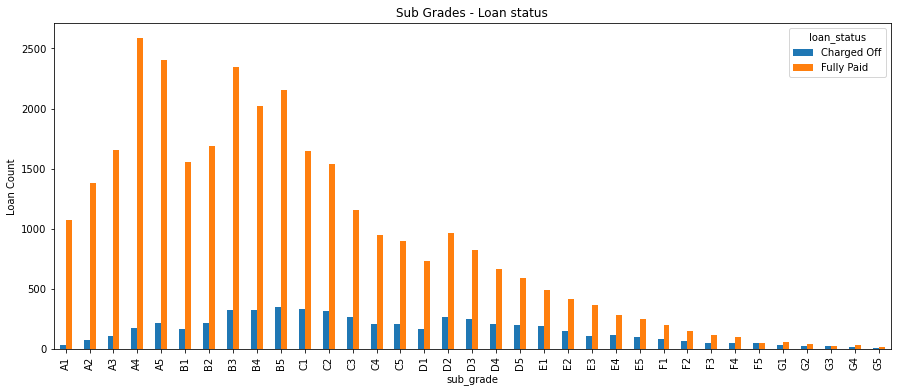

In [46]:
ax = df_pivot['id'].plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("Sub Grades - Loan status")
ax.set_xlabel("sub_grade")
ax.set_ylabel("Loan Count")
plt.show()

#### Obsesrvation 8 : Most of the Charged-Off Sub Grades are B,C, D. And we also observe that sub groups of  E, F, G have almost half od the defaulters when compared with Fully paid

In [47]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['purpose'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")


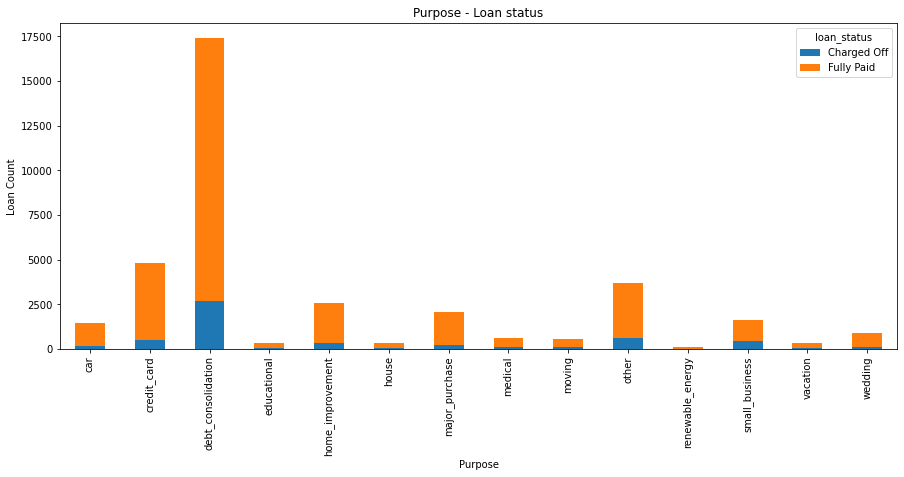

In [48]:
ax = df_pivot['id'].plot(kind="bar", stacked = True)
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("Purpose - Loan status")
ax.set_xlabel("Purpose")
ax.set_ylabel("Loan Count")
plt.show()

#### Observation 9 : From the above shown purpose histogram it is clearly seen that debt_consolidation has more in number for falling into charged off

In [49]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['emp_length'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")


Text(0, 0.5, 'Loan Count')

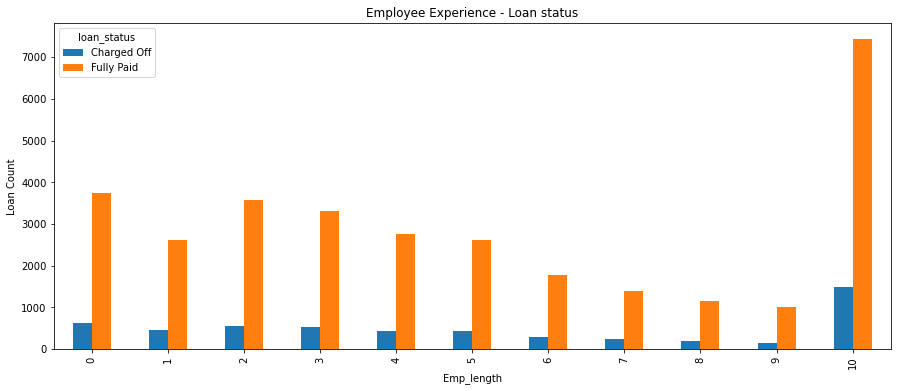

In [50]:
ax = df_pivot['id'].plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("Employee Experience - Loan status")
ax.set_xlabel("Emp_length")
ax.set_ylabel("Loan Count")

#### Observation 10 : From the above graph, we can say that If the emp_length is <1 year, 2 years, 3 years, +10 years then there is high change of falling into charged off

### CREATING bins for Interest Rate Column to get some insights from it

In [51]:
loan_dataset_cleared_iqr.int_rate.describe()

count   36815.000
mean       11.890
std         3.669
min         5.420
25%         8.940
50%        11.710
75%        14.270
max        24.400
Name: int_rate, dtype: float64

In [52]:
min_value = loan_dataset_cleared_iqr['int_rate'].min()
max_value = loan_dataset_cleared_iqr['int_rate'].max()
print(min_value)
print(max_value)

5.42
24.4


In [53]:
interest_bins = np.linspace(min_value,max_value,12)
interest_bins

array([ 5.42      ,  7.14545455,  8.87090909, 10.59636364, 12.32181818,
       14.04727273, 15.77272727, 17.49818182, 19.22363636, 20.94909091,
       22.67454545, 24.4       ])

In [54]:
labels = [4,6,8,10,12,14,16,18,20,22,24]

In [55]:
loan_dataset_cleared_iqr['interest_bins'] = pd.cut(loan_dataset_cleared_iqr['int_rate'], bins=interest_bins, labels=labels, include_lowest=True)

In [56]:
loan_dataset_cleared_iqr['interest_bins']

0        10
1        14
2        16
3        12
5         6
6        16
7        18
8        22
9        12
10       14
11       12
12       12
13        8
14       10
15       16
16       14
17        4
18       10
19        4
20       14
21       12
22       10
23       10
24       10
25        8
26       14
27       16
28       10
29       10
30        6
31        6
33        8
34       16
35       10
36        8
37        6
38       12
40        6
41        6
42       18
43       16
44        4
45        8
46        8
47       10
48        4
49        4
50        8
51        8
52       10
53       16
54        8
55       20
56       20
57       12
58       10
59       16
60       12
61       16
62       14
63       16
64       10
65       10
66       16
67       14
68       22
69       14
70       18
71       16
72       12
73       16
75       14
76       12
77       22
78        6
79       20
81       14
82       12
83        4
84       12
85       12
87       10
88       16
89  

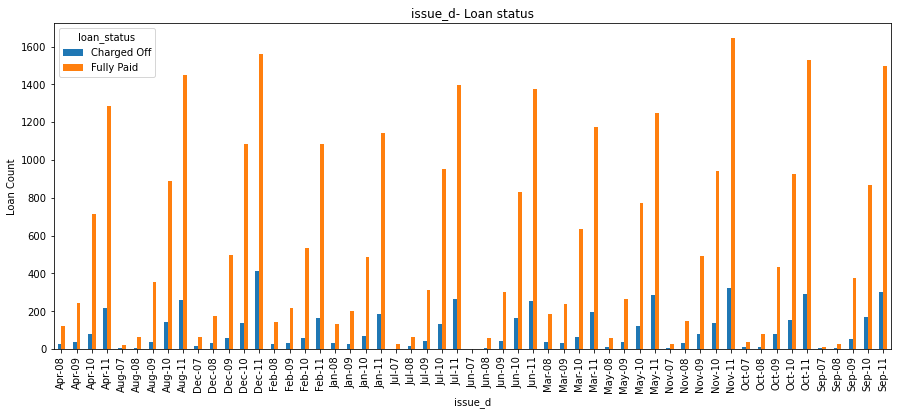

In [57]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['issue_d'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")
ax = df_pivot['id'].plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("issue_d- Loan status")
ax.set_xlabel("issue_d")
ax.set_ylabel("Loan Count")
plt.show()

#### Observation 11 : From the above graph, we can clearly say that the defaulter rate is increasing with the successive months and years

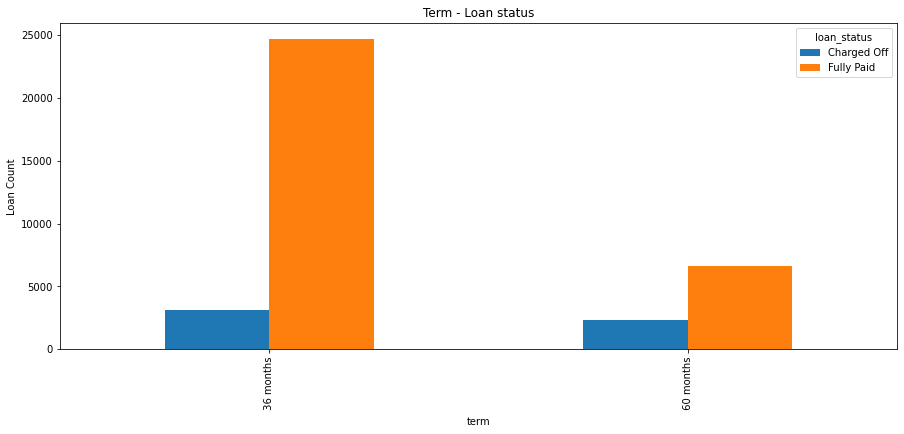

In [58]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['term'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")

ax = df_pivot['id'].plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("Term - Loan status")
ax.set_xlabel("term")
ax.set_ylabel("Loan Count")
plt.show()

#### Observation 12 : From the above graph We see that most of the defaulters lies in 36 months term

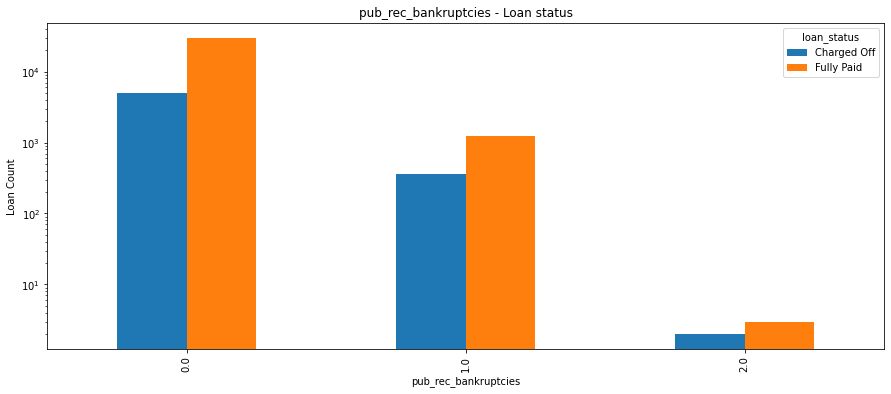

In [59]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['pub_rec_bankruptcies'] ,values=['id'],columns=['loan_status'] ,aggfunc = "count")
ax = df_pivot['id'].plot(kind="bar")
ax.set_yscale('log')
fig = ax.get_figure()
fig.set_size_inches(15, 6)
plt.title("pub_rec_bankruptcies - Loan status")
ax.set_xlabel("pub_rec_bankruptcies")
ax.set_ylabel("Loan Count")
plt.show()

#### Observation 13 : From the above log-log scale for pub_rec_bankruptcies we see that; If pub_rec_bankruptcies is 2 then almost half of the customers are tending to fall under Charged off categories

In [60]:
loan_dataset_cleared_iqr['dti_bins'] = pd.qcut(loan_dataset_cleared_iqr['dti'], q=10)
loan_dataset_cleared_iqr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,open_acc,revol_util,total_acc,pub_rec_bankruptcies,interest_bins,dti_bins
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.650,3,83.70%,9,0.000,10,"(22.38, 29.99]"
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.000,3,9.40%,4,0.000,14,"(-0.001, 4.17]"
2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.720,2,98.50%,10,0.000,16,"(7.13, 9.47]"
3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.000,10,21%,37,0.000,12,"(19.85, 22.38]"
5,1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,3,RENT,36000.000,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.200,9,28.30%,12,0.000,6,"(9.47, 11.58]"


Text(0, 0.5, 'Loan Count')

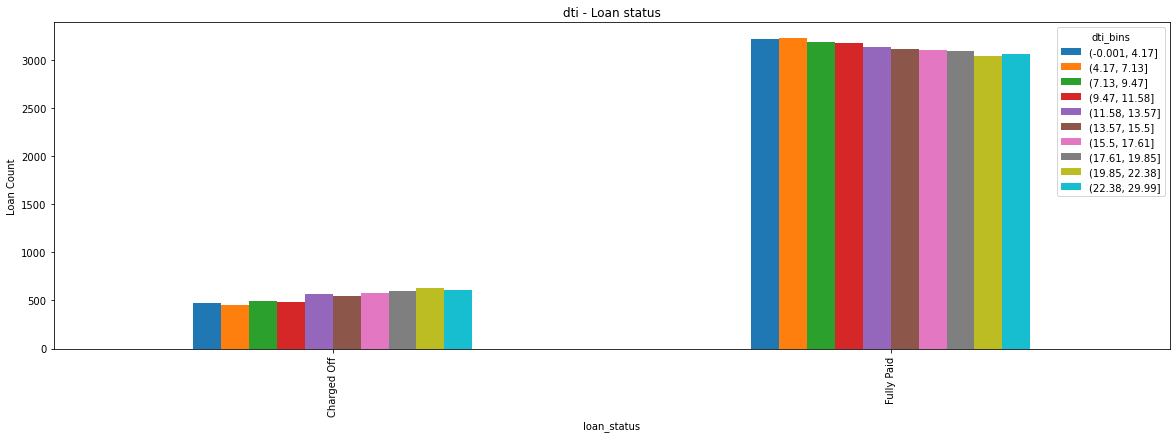

In [61]:
df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['loan_status'] ,values=['id'],columns=['dti_bins'] ,aggfunc = "count")
ax = df_pivot['id'].plot(kind="bar")


fig = ax.get_figure()

fig.set_size_inches(20,6)

plt.title("dti - Loan status")

ax.set_ylabel("Loan Count")

#### Observation 14 : From the above graph there is a slight increase of the defaulter when they have more dti. People having more dti tend to fall under chaarged off category
And at the same time from the fully paid , we see slight decrease when dti is increasing

Text(0, 0.5, 'Loan Count')

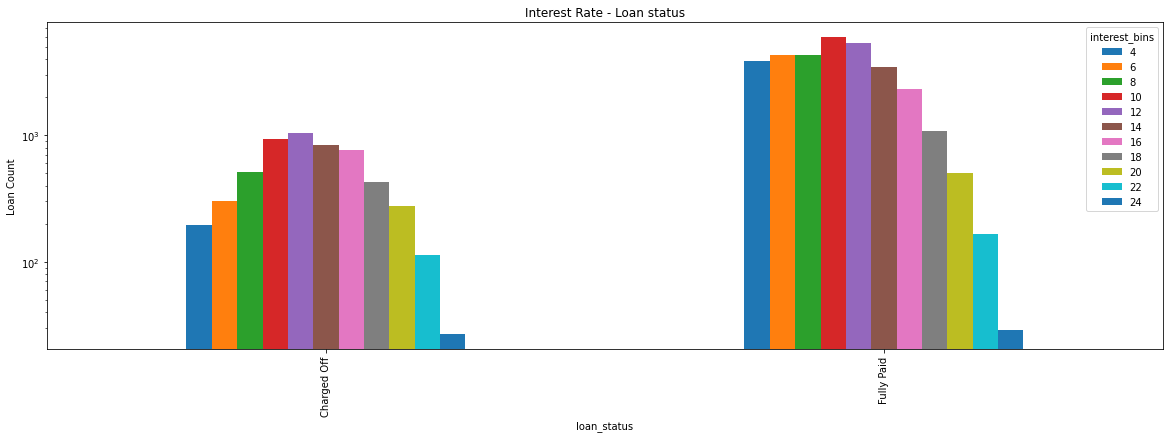

In [62]:
### Interest rates comparision

df_pivot = loan_dataset_cleared_iqr.pivot_table(index = ['loan_status'] ,values=['id'],columns=['interest_bins'] ,aggfunc = "count")

ax = df_pivot['id'].plot(kind="bar")
ax.set_yscale('log')

fig = ax.get_figure()

fig.set_size_inches(20,6)

plt.title("Interest Rate - Loan status")
ax.set_ylabel("Loan Count")

#### Observation 15 : If the intrest rate is increasing then the 'charged of's are more than the Fully paid individuals.

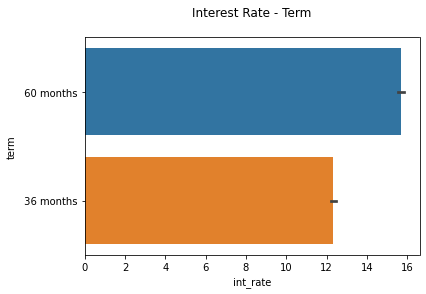

In [63]:
sns.barplot(charged_off_dataset.int_rate ,  charged_off_dataset.term)
plt.title("Interest Rate - Term\n")
plt.show()

#### Observation 16 : In the above graph, we have considered data set which have only 'Charged-Off' records. From that we observed that Term month with more intrest rate is having more tendency to fall under defaulters

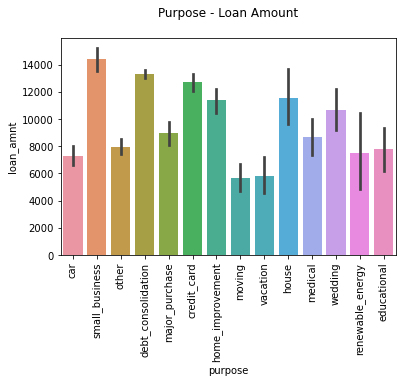

In [64]:
sns.barplot(charged_off_dataset.purpose ,  charged_off_dataset.loan_amnt)
plt.xticks(rotation = 90)

plt.title("Purpose - Loan Amount\n")
ax.set_ylabel("Loan Amount\n")
plt.show()

#### Observation 17: From the above graph, it is observed that if the loan amount is more than 10000 and if the purpose belongs to Small bussiness, debt_consolidation, credit card, home_improvemnt, house or wedding having chances to fall under defaulters record

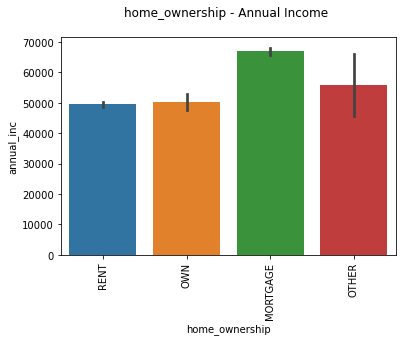

In [65]:
sns.barplot(charged_off_dataset.home_ownership ,  charged_off_dataset.annual_inc)
plt.xticks(rotation = 90)
plt.title("home_ownership - Annual Income \n")
ax.set_ylabel("Annual Income \n")
plt.show()

#### Observation 18 : From the above graph we observered that if the annual income is more than 50000 then Home_ownership with Mortgage is having more chances to fall under default list

## Recommendations

##### Good to avoid the applicant whose annual income is more with high mortgage value
#####  Avoid B,C &D Grade applicants
#####  Avoid A5 ,B3,B4,B5 & D2 Subgrade applicants
#####  Avoid the applicants from CA state
#####  Avoid purpose of the loan is either Small business, debt consolidation 
